# Proyek DAMI 

# Load Data

In [19]:
#Import library yang akan digunakan 
import pandas as pd
import sklearn
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
#Load dataset 
data = pd.read_csv('D:/1.KULIAH/SEMESTER 7/Penambangan Data/Proyek/Dataset/market_basket_rekomendasi_produk.csv')

In [3]:
#Melihat jumlah baris
data.shape

(131209, 7)

In [4]:
#Melihat jumlah kolom pada dataset
data.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'products'],
      dtype='object')

In [5]:
#Melihat sample data 
data[ :10]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,products
0,1,112108,4,4,10,9,Bulgarian Yogurt|Organic 4% Milk Fat Whole Mil...
1,36,79431,23,6,18,30,Grated Pecorino Romano Cheese|Spring Water|Org...
2,38,42756,6,6,16,24,Shelled Pistachios|Organic Biologique Limes|Or...
3,96,17227,7,6,20,30,Roasted Turkey|Organic Cucumber|Organic Grape ...
4,98,56463,41,3,8,14,Natural Spring Water|Organic Orange Juice With...
5,112,125030,5,5,14,26,Fresh Cauliflower|I Heart Baby Kale|Sea Salt B...
6,170,182389,7,0,13,14,Asian Chopped Salad with Dressing|XL Emerald W...
7,218,98711,12,0,21,17,Natural Artisan Water|Okra|Organic Yellow Peac...
8,226,51011,4,0,12,30,"Clementines, Bag|Banana|Kids! Chewables Probio..."
9,349,156353,9,3,16,30,Pure Irish Butter|Pure Almond Unsweetened Orig...


# Data Cleaning 

In [6]:
#Melihat jumlah missing value pada dataset
missing_values_count = data.isnull().sum()

In [11]:
#Melihat nilai yang hilang pada tiap kolom yang ada 
missing_values_count[:10]

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
products                  0
dtype: int64

Jika kita lihat pada dataset yang akan digunakan tidak terdapat
missing value (nilai yang hilang ) pada setiap kolomnya, maka 
pengerjaan dapat dilanjutkan

# Exploratory Data

In [12]:
#Melihat deskripsi dataset
data.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,1.312090e+05,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000
mean,1.704050e+06,103166.825317,16.603937,2.768431,13.581363,17.049859
std,9.889077e+05,59565.307804,16.661077,2.121701,4.221325,10.676832
min,1.000000e+00,1.000000,4.000000,0.000000,0.000000,0.000000
25%,8.451640e+05,51587.000000,6.000000,1.000000,10.000000,7.000000
50%,1.696847e+06,103150.000000,10.000000,3.000000,14.000000,15.000000
75%,2.561480e+06,154868.000000,20.000000,5.000000,17.000000,30.000000
max,3.421070e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [13]:
#melihat tipe atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131209 entries, 0 to 131208
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   order_id                131209 non-null  int64 
 1   user_id                 131209 non-null  int64 
 2   order_number            131209 non-null  int64 
 3   order_dow               131209 non-null  int64 
 4   order_hour_of_day       131209 non-null  int64 
 5   days_since_prior_order  131209 non-null  int64 
 6   products                131209 non-null  object
dtypes: int64(6), object(1)
memory usage: 7.0+ MB


Pada output dari cell diatas memberitahu kita mengenai jumlah dan tipe data yang tertampung pada tabel

In [14]:
#Melihat missing value kembali
for col in data.columns:
    print(col, data[col].isnull().sum())

order_id 0
user_id 0
order_number 0
order_dow 0
order_hour_of_day 0
days_since_prior_order 0
products 0


In [15]:
#Melihat dimensi (bentuk) dari data yang kita gunakan
data.shape

(131209, 7)

In [16]:
#Melihat korelasi antar data yang kita miliki
correlations = data.corr(method ='kendall')

In [17]:
correlations

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.002231,0.000409,0.002272,-0.001267,0.001000
user_id,-0.002231,1.000000,-0.004775,-0.000987,-0.000091,0.002088
order_number,0.000409,-0.004775,1.000000,0.010221,-0.021343,-0.275802
order_dow,0.002272,-0.000987,0.010221,1.000000,0.003368,-0.019117
order_hour_of_day,-0.001267,-0.000091,-0.021343,0.003368,1.000000,-0.002162
days_since_prior_order,0.001000,0.002088,-0.275802,-0.019117,-0.002162,1.000000


Kita akan memvisualisasikan korelasi antar atribut pada dataset menggunakan correlation map dalam bentuk heat map
dimana atribut yang memiliki korelasi yang tinggi warna nya akan lebih terang dibanding dengan korelasi atribut yang lain

<function matplotlib.pyplot.show(*args, **kw)>

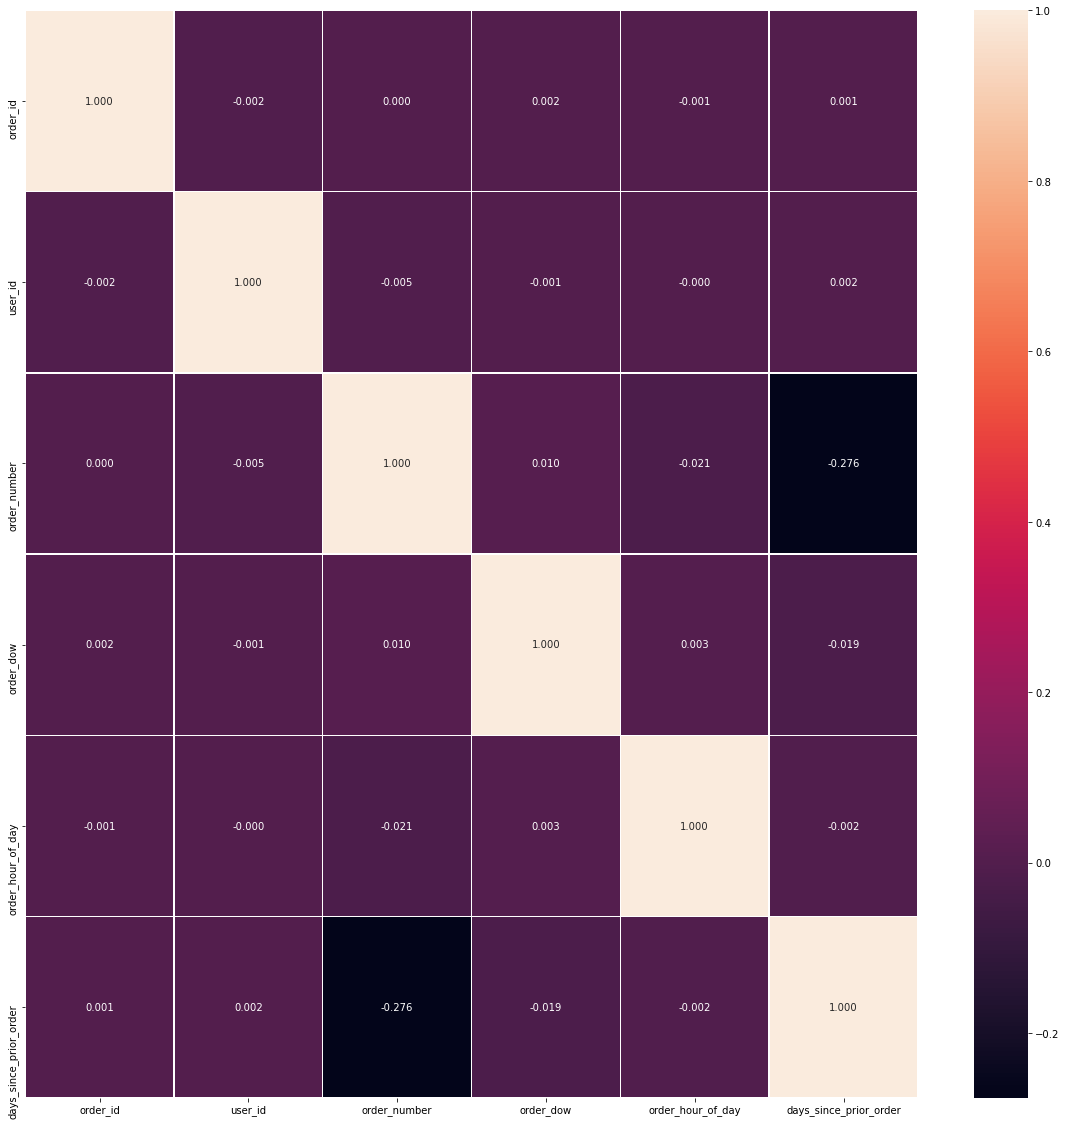

In [21]:
# correlation map
# higher correlations are brighter
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.show

In [25]:
#Melihat distribusi dari data yang kita gunakan 
print(data.groupby('order_number').size())

order_number
4      15300
5      12439
6      10337
7       8853
8       7357
       ...  
96        44
97        30
98        31
99        31
100      867
Length: 97, dtype: int64


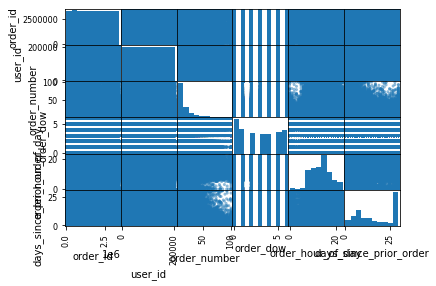

In [28]:
scatter_matrix(data)
plt.show()

In [30]:
#Mencetak unique value dari kolom Order_id
print('Unique Items Dari Kolom Order_id: ', data['order_id'].nunique())
print( '\n', data['order_id'].unique())

Unique Items Dari Kolom Order_id:  131209

 [      1      36      38 ... 3421058 3421063 3421070]


In [31]:
#Mencetak unique value dari kolom user_id
print('Unique Items Dari Kolom User_id: ', data['user_id'].nunique())
print( '\n', data['user_id'].unique())

Unique Items Dari Kolom User_id:  131209

 [112108  79431  42756 ... 136952 169679 139822]


In [32]:
#Mencetak unique value dari kolom order_number
print('Unique Items Dari Kolom Order_number: ', data['order_number'].nunique())
print( '\n', data['order_number'].unique())

Unique Items Dari Kolom Order_number:  97

 [  4  23   6   7  41   5  12   9  21  31  25  10 100  15  18  11  40  17
  32  16  52   8  55  22  39  13  20  34  70  28  73  43  54  14  44  29
  35  27  49  24  19  67  26  33  62  36  56  59  37  38  30  57  48  45
  61  47  46  51  71  93  80  64  98  42  77  58  75  63  83  88  84  94
  65  92  53  86  69  68  79  50  74  87  72  81  60  95  76  66  90  85
  78  82  89  99  91  96  97]


In [33]:
#Mencetak unique value dari kolom order_dow
print('Unique Items Dari Kolom Order_dow: ', data['order_dow'].nunique())
print( '\n', data['order_dow'].unique())

Unique Items Dari Kolom Order_dow:  7

 [4 6 3 5 0 1 2]


In [34]:
#Mencetak unique value dari kolom order_hour_of_day
print('Unique Items Dari Kolom Order_hour_of_day: ', data['order_hour_of_day'].nunique())
print( '\n', data['order_hour_of_day'].unique())

Unique Items Dari Kolom Order_hour_of_day:  24

 [10 18 16 20  8 14 13 21 12 17  9 15  7 19  6 11 22 23  0  4  1  2  5  3]


In [35]:
#Mencetak unique value dari kolom days_since_prior_order
print('Unique Items Dari Kolom Days_since_prior_order: ', data['days_since_prior_order'].nunique())
print( '\n', data['days_since_prior_order'].unique())

Unique Items Dari Kolom Days_since_prior_order:  31

 [ 9 30 24 14 26 17 13  8 27  6 12 11  4  7 10 16  0  3 19 21  5 23 15  2
 18 29  1 20 22 28 25]


In [36]:
#Mencetak unique value dari kolom products
print('Unique Items Dari Kolom Products: ', data['products'].nunique())
print( '\n', data['products'].unique())

Unique Items Dari Kolom Products:  126954

 ['Bulgarian Yogurt|Organic 4% Milk Fat Whole Milk Cottage Cheese|Organic Celery Hearts|Cucumber Kirby|Lightly Smoked Sardines in Olive Oil|Bag of Organic Bananas|Organic Hass Avocado|Organic Whole String Cheese'
 'Grated Pecorino Romano Cheese|Spring Water|Organic Half & Half|Super Greens Salad|Cage Free Extra Large Grade AA Eggs|Prosciutto, Americano|Organic Garnet Sweet Potato (Yam)|Asparagus'
 'Shelled Pistachios|Organic Biologique Limes|Organic Raw Unfiltered Apple Cider Vinegar|Organic Baby Arugula|Organic Hot House Tomato|Green Peas|Bunched Cilantro|Flat Parsley, Bunch|Fresh Dill'
 ...
 'Wine Infused Salame Cheese and Crackers Small Plates|Extralean Ground Turkey Breast|Sweet Potatoes|Club Soda Lower Sodium|Classic Britannia Crisps|Baby Brie|Genoa Salame with White Cheddar Cheese & Toasted Rounds Small Plates|White Giant Paper Towel Rolls'
 'Organic Half & Half|No Salt Added Gluten-Free Blue Chips Made with Organic Blue Corn|Natural Art

In [37]:
#mengambil atribut products
products =data.loc[:,['products']]

In [38]:
products


,products
0,Bulgarian Yogurt|Organic 4% Milk Fat Whole Mil...
1,Grated Pecorino Romano Cheese|Spring Water|Org...
2,Shelled Pistachios|Organic Biologique Limes|Or...
3,Roasted Turkey|Organic Cucumber|Organic Grape ...
4,Natural Spring Water|Organic Orange Juice With...
...,...
131204,Gluten Free Rice Bread|Organic Whole Grain Whe...
131205,Total Plain Greek Strained Yogurt|Homestyle Cl...
131206,Wine Infused Salame Cheese and Crackers Small ...
131207,Organic Half & Half|No Salt Added Gluten-Free ...


In [39]:
#mengubah caracter "|" menjadai "," (komma), dan ditampung oleh atribut baru
products['Changes_line'] = products['products'].apply(lambda x: 
                                                    [re.sub(r"[\|]", ",", word) for word in x.split(",")])

In [40]:
#Melihat perubahannya
products

,products,Changes_line
0,Bulgarian Yogurt|Organic 4% Milk Fat Whole Mil...,"[Bulgarian Yogurt,Organic 4% Milk Fat Whole Mi..."
1,Grated Pecorino Romano Cheese|Spring Water|Org...,"[Grated Pecorino Romano Cheese,Spring Water,Or..."
2,Shelled Pistachios|Organic Biologique Limes|Or...,"[Shelled Pistachios,Organic Biologique Limes,O..."
3,Roasted Turkey|Organic Cucumber|Organic Grape ...,"[Roasted Turkey,Organic Cucumber,Organic Grape..."
4,Natural Spring Water|Organic Orange Juice With...,"[Natural Spring Water,Organic Orange Juice Wit..."
...,...,...
131204,Gluten Free Rice Bread|Organic Whole Grain Whe...,"[Gluten Free Rice Bread,Organic Whole Grain Wh..."
131205,Total Plain Greek Strained Yogurt|Homestyle Cl...,"[Total Plain Greek Strained Yogurt,Homestyle C..."
131206,Wine Infused Salame Cheese and Crackers Small ...,[Wine Infused Salame Cheese and Crackers Small...
131207,Organic Half & Half|No Salt Added Gluten-Free ...,"[Organic Half & Half,No Salt Added Gluten-Free..."
